In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

loan_data = pd.read_csv("C:/Users/HARSH/Downloads/loan.csv")

In [6]:
print("First few rows:")
print(loan_data.head())

print("\nLoan approval counts:")
print(loan_data['Loan_Status_label'].value_counts())


First few rows:
   age  campaign  pdays  previous  no_previous_contact  not_working  \
0   56         1    999         0                    1            0   
1   57         1    999         0                    1            0   
2   37         1    999         0                    1            0   
3   40         1    999         0                    1            0   
4   56         1    999         0                    1            0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0           0                0                 0              1  ...   
1           0                0                 0              0  ...   
2           0                0                 0              0  ...   
3           1                0                 0              0  ...   
4           0                0                 0              0  ...   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1           

In [ ]:
X = loan_data.drop('Loan_Status_label', axis=1)
y = loan_data['Loan_Status_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2%}")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Model Accuracy: 88.86%

Top 10 important features:
                Feature  Importance
0                   age    0.218101
1              campaign    0.093865
2                 pdays    0.044649
58     poutcome_success    0.030385
4   no_previous_contact    0.024716
33           housing_no    0.021957
35          housing_yes    0.021886
53      day_of_week_thu    0.020625
54      day_of_week_tue    0.019970
52      day_of_week_mon    0.019528


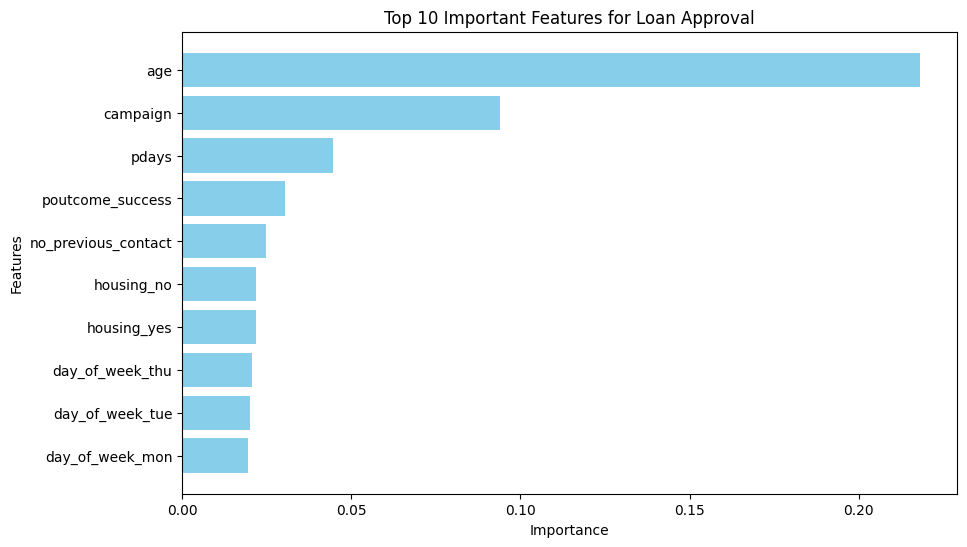

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance['Feature'].head(10),
    feature_importance['Importance'].head(10),
    color='skyblue'
)
plt.title('Top 10 Important Features for Loan Approval')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  
plt.show()
